### Concatenation fichier HW1

## suppression "TS_"

In [4]:
import os

# Chemin vers le répertoire contenant les fichiers
repertoirOrigine = "C:/Users/tjean/Desktop/Nouveau dossier"
repertoire = repertoirOrigine + "/DATA/"

# Boucle sur chaque fichier dans le répertoire
for fichier in os.listdir(repertoire):
    # Vérifie si le fichier commence par "TS_"
    if fichier.startswith("TS_"):
        # Construit le nouveau nom de fichier en supprimant le préfixe "TS_"
        nouveau_nom = fichier.replace("TS_", "")
        
        # Chemin complet du fichier actuel
        chemin_actuel = os.path.join(repertoire, fichier)
        
        # Chemin complet pour le nouveau fichier
        chemin_nouveau = os.path.join(repertoire, nouveau_nom)
        
        # Renomme le fichier
        os.rename(chemin_actuel, chemin_nouveau)
        
        print(f'Le fichier "{fichier}" a été renommé en "{nouveau_nom}"')


## Concaténation des fichiers avec le même numéro d'ordre

In [5]:
fichierConcat = {}

# Parcours des fichiers dans le répertoire
for nom_fichier in os.listdir(repertoire):
    chemin_fichier = os.path.join(repertoire, nom_fichier)

    # Vérifier si le fichier est un fichier ordinaire
    if os.path.isfile(chemin_fichier):
        # Extraire le deuxième nombre du nom de fichier
        deuxieme_nombre = nom_fichier.split('_')[1]

        # Ajouter le fichier au dictionnaire en utilisant le deuxième nombre comme clé
        if deuxieme_nombre in fichierConcat:
            fichierConcat[deuxieme_nombre].append(chemin_fichier)
        else:
            fichierConcat[deuxieme_nombre] = [chemin_fichier]


if os.path.exists(f'{repertoirOrigine}/dataConcatenate') == False:
    os.mkdir(f'{repertoirOrigine}/dataConcatenate')

# Concaténer les fichiers ligne par ligne
for deuxieme_nombre, chemins_fichiers in fichierConcat.items():
    resultat_concatene = []
    # Lire chaque fichier ligne par ligne et concaténer
    for chemin_fichier in chemins_fichiers:
        with open(chemin_fichier, 'r') as fichier:
            resultat_concatene.extend(fichier.readlines())
    # Écrire le résultat dans un nouveau fichier
    fichier_sortie = f'{repertoirOrigine}/dataConcatenate/concatene_{deuxieme_nombre}.csv'
    with open(fichier_sortie, 'w') as fichier:
        fichier.writelines(resultat_concatene)
    print(f'Fichiers concaténés ppar canal {deuxieme_nombre}. Résultat dans {fichier_sortie}')


Fichiers concaténés ppar canal 02. Résultat dans C:/Users/tjean/Desktop/Nouveau dossier/dataConcatenate/concatene_02.csv
Fichiers concaténés ppar canal 03. Résultat dans C:/Users/tjean/Desktop/Nouveau dossier/dataConcatenate/concatene_03.csv
Fichiers concaténés ppar canal 20. Résultat dans C:/Users/tjean/Desktop/Nouveau dossier/dataConcatenate/concatene_20.csv
Fichiers concaténés ppar canal 98. Résultat dans C:/Users/tjean/Desktop/Nouveau dossier/dataConcatenate/concatene_98.csv


## Affichage des graphs 

In [6]:
from datetime import datetime
import matplotlib.pyplot as plt

nomFichier = [
    repertoirOrigine + "/dataConcatenate/concatene_02.csv",
    repertoirOrigine + "/dataConcatenate/concatene_02.csv",
    repertoirOrigine + "/dataConcatenate/concatene_03.csv",
    repertoirOrigine + "/dataConcatenate/concatene_03.csv",
    repertoirOrigine + "/dataConcatenate/concatene_04.csv",
    repertoirOrigine + "/dataConcatenate/concatene_09.csv",
    repertoirOrigine + "/dataConcatenate/concatene_20.csv",
    repertoirOrigine + "/dataConcatenate/concatene_05.csv",
    repertoirOrigine + "/dataConcatenate/concatene_05.csv"
]

coloneAffichage = [1, 2, 1, 2, 1, 1, 1, 1, 2]

nomPlot = [
    "Courant I", "Courant I_moy", "Tension U", "Tension U_moy", "CAP", "SOC", "Température Bat", "Latitude", "Longitude"
]

markerPlot = "."
dossier_enregistrement = repertoirOrigine + "/graph/"

In [7]:
def charger_donnees(nom_fichier, indiceColone):
    with open(nom_fichier, 'r') as fichier:
        lignes = fichier.readlines()
        dates = [ligne.split(',')[0] for ligne in lignes]
        valeurs = [float(ligne.split(',')[indiceColone]) for ligne in lignes]
    return dates, valeurs

def tracer_graphique(dates, valeurs, nom_trace, chemin_enregistrement=None):
    # Convertir les dates en objets datetime
    dates_formattees = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f') for date in dates]

    # Créer un nouveau graphique
    plt.figure()

    # Tracer le graphique
    plt.plot(dates_formattees, valeurs, marker=markerPlot)
    plt.xlabel('Date')
    plt.ylabel('Valeur')
    plt.title(nom_trace)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Enregistrer le graphique dans le dossier spécifié
    if chemin_enregistrement:
        nom_fichier_enregistrement = os.path.join(chemin_enregistrement, f"{nom_trace}.png")
        plt.savefig(nom_fichier_enregistrement)
        print(f"Graphique enregistré dans : {nom_fichier_enregistrement}")
    else:
        plt.show()


Nombre de données :  9
Graphique enregistré dans : C:/Users/tjean/Desktop/Nouveau dossier/graph/Courant I.png
Graphique enregistré dans : C:/Users/tjean/Desktop/Nouveau dossier/graph/Courant I_moy.png
Graphique enregistré dans : C:/Users/tjean/Desktop/Nouveau dossier/graph/Tension U.png
Graphique enregistré dans : C:/Users/tjean/Desktop/Nouveau dossier/graph/Tension U_moy.png


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/tjean/Desktop/Nouveau dossier/dataConcatenate/concatene_04.csv'

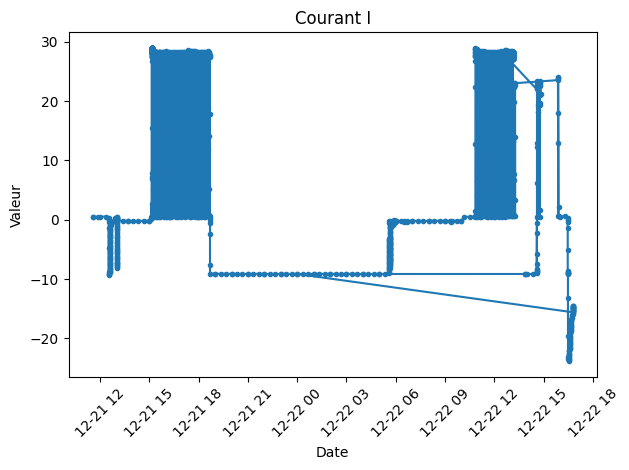

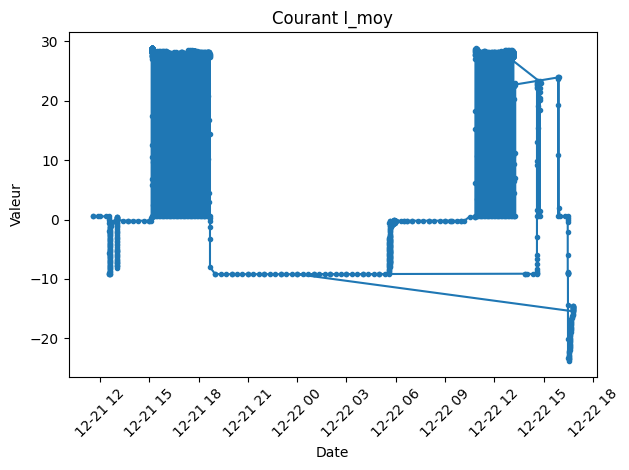

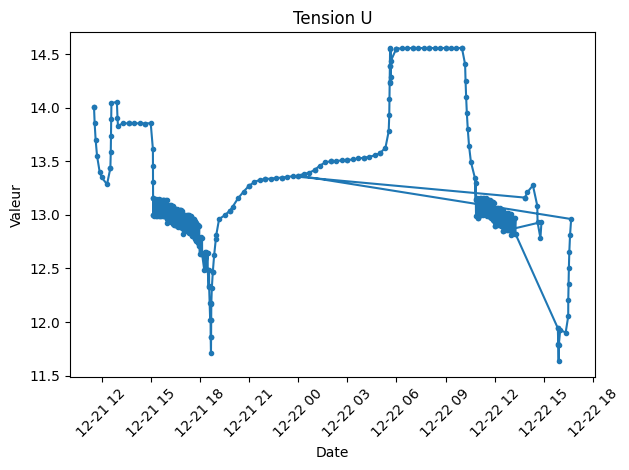

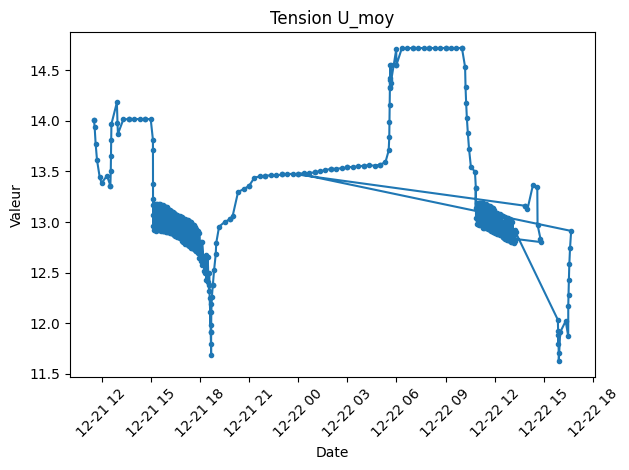

In [8]:
# Créer le dossier de destination s'il n'existe pas
if not os.path.exists(dossier_enregistrement):
    os.makedirs(dossier_enregistrement)

print("Nombre de données : ", len(nomFichier))

for index in range(len(nomFichier)):
    # Chargement des données et tracé du graphique
    dates, valeurs = charger_donnees(nomFichier[index], coloneAffichage[index])
    tracer_graphique(dates, valeurs, nomPlot[index], dossier_enregistrement)
